# UCI Machine Learning Repository - Adult Income Data set
For this project we will be working with the UCI Repository Wiconsin Brest Cancer Data Set. This is a very famous data set and quite many papers have been published on the same!

We'll be trying to predict a classification- Diagnosis is Malignant '4' or benign '2'. 
Let's begin our understanding of implementing K-Nearest Neighbour in Python for classification.

We'll use the raw version of the data set (the one provided), and perform some categorical variables encoding (dummy variables) in python for quite many features if required.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

Let's start by reading in the adult.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt', 
                 names=['id','clump_thickness','uni_cellsize','uni_cellshape',
                        'adhesion','epi_cellsize','nuclei','chromatin','nucleoli','mitoses',
                       'class'])

In [3]:
df.head()

,id,clump_thickness,uni_cellsize,uni_cellshape,adhesion,epi_cellsize,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.dtypes

id                  int64
clump_thickness     int64
uni_cellsize        int64
uni_cellshape       int64
adhesion            int64
epi_cellsize        int64
nuclei             object
chromatin           int64
nucleoli            int64
mitoses             int64
class               int64
dtype: object

#### Removing Null/NaN values
'nuclei' is a String Object, Hence we will convert it to Integer or Float.
Here we will convert it to float and remove the row corresponding to 'nan' value in 'nuclei'

In [6]:
df['nuclei'] = df.nuclei.convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump_thickness    699 non-null int64
uni_cellsize       699 non-null int64
uni_cellshape      699 non-null int64
adhesion           699 non-null int64
epi_cellsize       699 non-null int64
nuclei             683 non-null float64
chromatin          699 non-null int64
nucleoli           699 non-null int64
mitoses            699 non-null int64
class              699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [12]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                 683 non-null int64
clump_thickness    683 non-null int64
uni_cellsize       683 non-null int64
uni_cellshape      683 non-null int64
adhesion           683 non-null int64
epi_cellsize       683 non-null int64
nuclei             683 non-null float64
chromatin          683 non-null int64
nucleoli           683 non-null int64
mitoses            683 non-null int64
class              683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


#### After removing the 'nan' from the data set in the above command, we are remained with 683 entries in data set as compared to 699 with nan

## Exploratory Data Analysis

Performing some exploratory data analysis for better knowing the data set

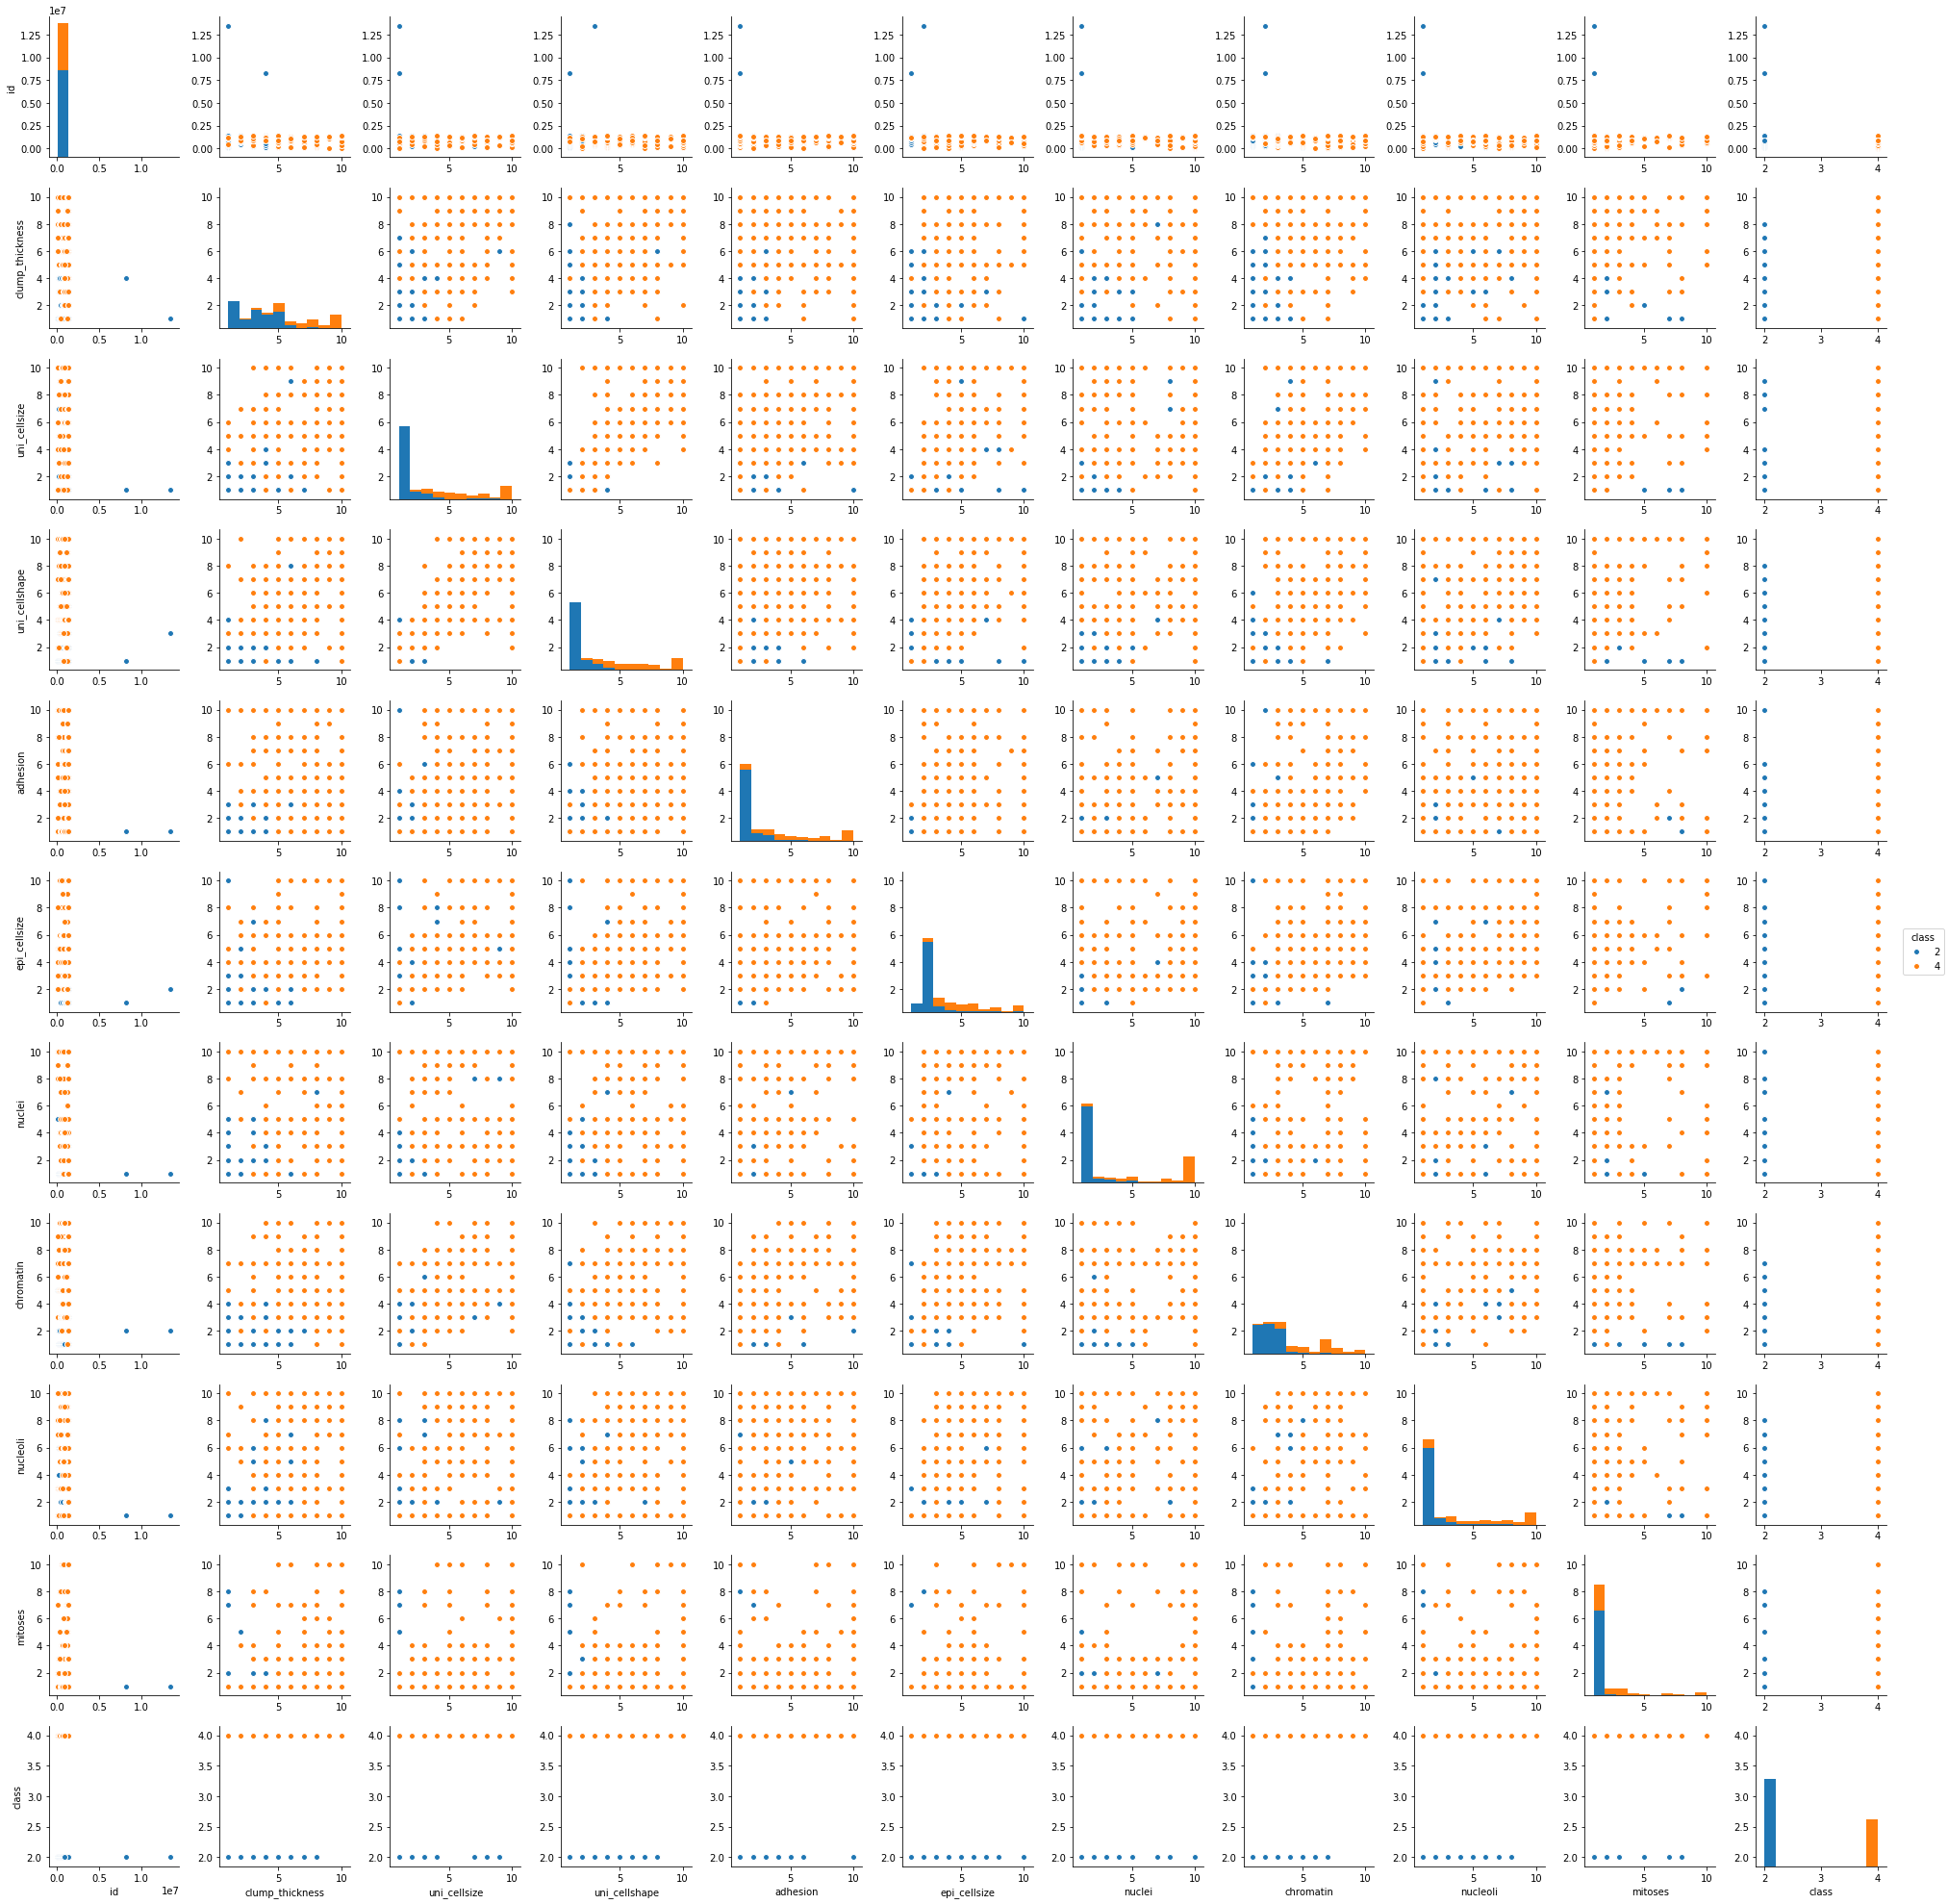

In [16]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='class')

Checking if there are any missin data in the data set with the help of heatmap

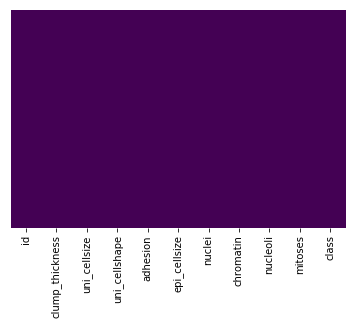

In [17]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

From the above heatmap, Looks like there is no missing data in the data set

Text(0.5,1,'Clump Thickness Vs Cancer Scale')

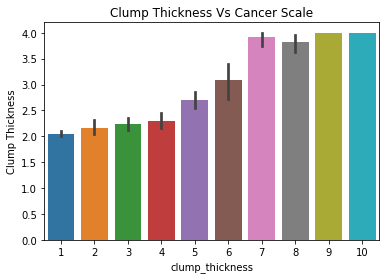

In [18]:
sns.barplot(df['clump_thickness'], df['class'])
plt.ylabel('Cancer Scale')
plt.ylabel('Clump Thickness')
plt.title('Clump Thickness Vs Cancer Scale')

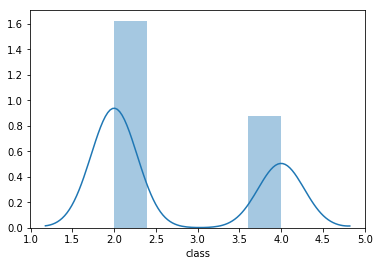

In [19]:
sns.distplot(df['class'])

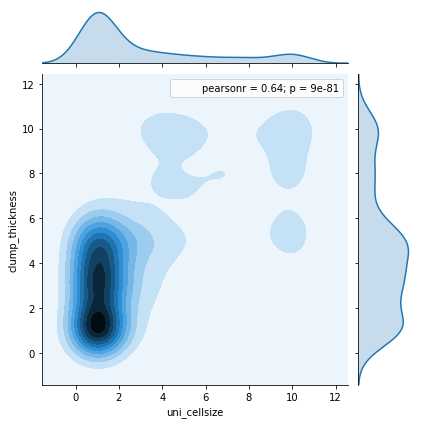

In [20]:
sns.jointplot(df.uni_cellsize, df.clump_thickness, kind='kde')

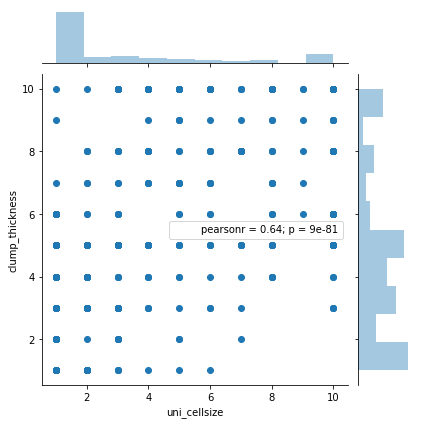

In [21]:
sns.jointplot(df.uni_cellsize, df.clump_thickness)

## Data Cleaning
Cleaning the data, if any required and creating categorical variables, if any required

The 'id' column is note required, it can be dropped as it is just an id

In [22]:
df.drop('id', axis=1, inplace=True)

In [23]:
df.head()

,clump_thickness,uni_cellsize,uni_cellshape,adhesion,epi_cellsize,nuclei,chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


## Feature Scaling
Normalising the features using Scikit Learn Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(df.drop('class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scaled_feat = scaler.transform(df.drop('class', axis=1))

Converting the 'scaled_feat' to a dataframe

In [30]:
data = pd.DataFrame(scaled_feat,columns= df.columns[:-1] )

In [31]:
data.head()

,clump_thickness,uni_cellsize,uni_cellshape,adhesion,epi_cellsize,nuclei,chromatin,nucleoli,mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


## Training & Test Data
Creating the Training & Test Data from the Data Set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train,y_test = train_test_split(data, df['class'], test_size=0.3, random_state=101)

## Initializing, Training & Testing Model
Now inititaling the model, then traning with the training data set and testing with the test data set

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [38]:
pred = knn.predict(X_test)

## Evaluating the Model
Now once the model has been trained and tested, we will evaluate the model using the metrics

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test, pred))

[[128   2]
 [  5  70]]


             precision    recall  f1-score   support

          2       0.96      0.98      0.97       130
          4       0.97      0.93      0.95        75

avg / total       0.97      0.97      0.97       205



## Finding the best probable value of 'K' - Elbow Method
Using the elbow method to find the best probable value of 'K' for which the error is least

In [44]:
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now we have got an array 'error_rate' that contains the mean of errors for every iteration of 'K' from 1 to 30. We will use this to get the value of 'K' for which the error rate is lowest. Let's plot this information on graph so that it's easy to interpret the same.

Text(0.5,1,'K Value Vs Error Rate')

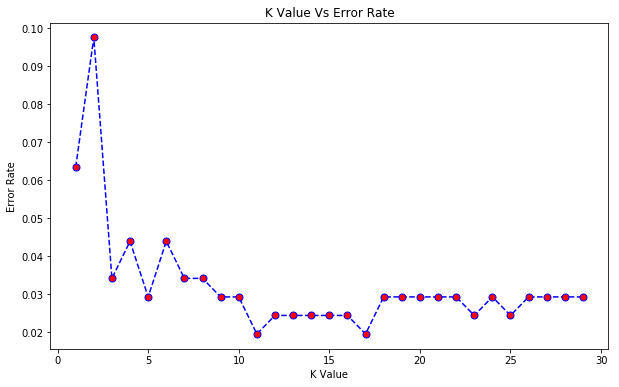

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markerfacecolor='red', color='blue', linestyle='--', markersize=7)
plt.ylabel('Error Rate')
plt.xlabel('K Value')
plt.title('K Value Vs Error Rate')

# For K = 11 or K=12
From the above plot, it is evident that the error rate goes down as we increase the 'K' value till k=17 or 18. We may further calculate the K values, but the looks like after that the error rate usually remains constant.

You may try with larger K values if you wish.

NOTE: If you find the below value of 'K' not equal to 11 or 12, then i would have been experimenting with the values of 'K' to get the optimal result. But anyway, you get the essene right !

Hence now training and fitting the model for K=6 and evaluating the model

In [49]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [50]:
pred = knn.predict(X_test)

In [51]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test, pred))

[[129   1]
 [  4  71]]


             precision    recall  f1-score   support

          2       0.97      0.99      0.98       130
          4       0.99      0.95      0.97        75

avg / total       0.98      0.98      0.98       205



#### Hence our KNN Model is 98% accurate. That's quite an accuacy !!